In [67]:
import matplotlib.pyplot as plt
import numpy as np
from Q_Learning import evaluate, train, make_QTables
from extended_pd import parallel_env

In [68]:
env = parallel_env()

# Values of gamma to test
gamma_values = [0.8, 0.9, 0.95, 0.99]

# Lists to store results for each gamma
mean_rewards_list = []

In [69]:
trials = 1

tot_rew = []

for t in range(trials):

    tot_rew_per_episode = []

    for gamma in gamma_values:
        alfa = 0.01
        adecay = 0.0001
        env = parallel_env()
        observations, infos = env.reset()
        qtables = make_QTables(env, gamma)
        qtables,tot_rew_per_gamma = train(env, 100000, 0, 0.2, 0.000006, 100, qtables, gamma, alfa, adecay)
        tot_rew_per_episode.append(tot_rew_per_gamma)
    
    tot_rew.append(tot_rew_per_episode)

In [70]:
print(tot_rew)

[[[0.25333333333333324, 0.3366666666666666, 0.3477777777777777, 0.3544444444444445, 0.38000000000000006, 0.3533333333333332, 0.37888888888888883, 0.3366666666666666, 0.3466666666666665, 0.36333333333333323, 0.37111111111111095, 0.34222222222222215, 0.32333333333333325, 0.3266666666666666, 0.33777777777777757, 0.3333333333333332, 0.33111111111111086, 0.33333333333333326, 0.3477777777777777, 0.3299999999999999, 0.3166666666666665, 0.2833333333333332, 0.31444444444444425, 0.3144444444444443, 0.34444444444444433, 0.31666666666666654, 0.3677777777777777, 0.30444444444444435, 0.3344444444444443, 0.32444444444444437, 0.32555555555555543, 0.31666666666666654, 0.2966666666666666, 0.31999999999999984, 0.302222222222222, 0.2999999999999999, 0.31666666666666643, 0.29444444444444434, 0.322222222222222, 0.2855555555555554, 0.31444444444444425, 0.3299999999999999, 0.30111111111111094, 0.3266666666666666, 0.3288888888888887, 0.3299999999999998, 0.27777777777777773, 0.3233333333333332, 0.32222222222222

In [71]:
my_array = np.array(tot_rew)

my_array.shape

(1, 4, 100000)

In [72]:
average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(4, 100000)

In [73]:
average_payoffs

array([[0.25333333, 0.33666667, 0.34777778, ..., 0.53      , 0.53      ,
        0.51888889],
       [0.27777778, 0.29888889, 0.31      , ..., 0.55222222, 0.54333333,
        0.54444444],
       [0.18111111, 0.26555556, 0.28111111, ..., 0.55      , 0.54555556,
        0.54777778],
       [0.31777778, 0.33555556, 0.34555556, ..., 0.4       , 0.39777778,
        0.40222222]])

In [74]:
average_payoffs = np.transpose(average_payoffs)

average_payoffs.shape

(100000, 4)

In [75]:
average_payoffs

array([[0.25333333, 0.27777778, 0.18111111, 0.31777778],
       [0.33666667, 0.29888889, 0.26555556, 0.33555556],
       [0.34777778, 0.31      , 0.28111111, 0.34555556],
       ...,
       [0.53      , 0.55222222, 0.55      , 0.4       ],
       [0.53      , 0.54333333, 0.54555556, 0.39777778],
       [0.51888889, 0.54444444, 0.54777778, 0.40222222]])

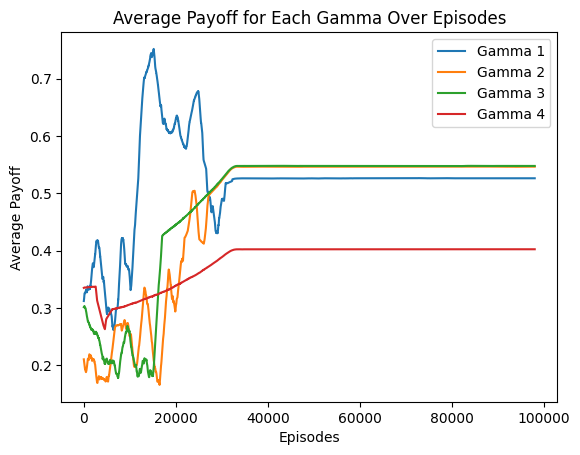

In [76]:
# Calculate the average payoff for each gamma
average_payoffs = np.mean(my_array, axis=0)

# Transpose the array for plotting
average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 2000

# Create a plot
fig, ax = plt.subplots()

# Plot each line for different gammas with smoothing
for i in range(average_payoffs.shape[1]):
    smoothed_values = np.convolve(average_payoffs[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=f'Gamma {i+1}')

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Gamma Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()